<a href="https://colab.research.google.com/github/Ajinkya-dak/Nifty-50-Close-price-prediction-/blob/main/Project_Nifty_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import lightgbm as lgb
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product                   # some useful functions
from tqdm import tqdm_notebook

%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_org = pd.read_csv('/content/drive/MyDrive/NIFTY /NIFTY 50_Data.csv')

In [7]:
df = df_org.copy()

In [8]:
df.head()

,Date,Open,High,Low,Close
0,03-Jan-00,1482.15,1592.90,1482.15,1592.2
1,04-Jan-00,1594.40,1641.95,1594.40,1638.7
2,05-Jan-00,1634.55,1635.50,1555.05,1595.8
3,06-Jan-00,1595.80,1639.00,1595.80,1617.6
4,07-Jan-00,1616.60,1628.25,1597.20,1613.3


In [9]:
df.tail()

,Date,Open,High,Low,Close
5717,26-Dec-22,17830.40,18084.10,17774.25,18014.6
5718,27-Dec-22,18089.80,18149.25,17967.45,18132.3
5719,28-Dec-22,18084.75,18173.10,18068.35,18122.5
5720,29-Dec-22,18045.70,18229.70,17992.80,18191.0
5721,30-Dec-22,18259.10,18265.25,18080.30,18105.3


In [10]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


In [12]:
df.set_index('Date',inplace=True)

In [13]:
df.head()

,Open,High,Low,Close
Date,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2
2000-01-04,1594.40,1641.95,1594.40,1638.7
2000-01-05,1634.55,1635.50,1555.05,1595.8
2000-01-06,1595.80,1639.00,1595.80,1617.6
2000-01-07,1616.60,1628.25,1597.20,1613.3


In [14]:
df.describe()

,Open,High,Low,Close
count,5722.000000,5722.000000,5722.000000,5722.000000
mean,6386.372571,6426.841113,6336.984437,6382.912592
std,4553.392455,4569.824739,4527.090794,4549.277647
min,853.000000,877.000000,849.950000,854.200000
25%,2401.762500,2424.512500,2379.012500,2403.750000
50%,5412.725000,5450.375000,5368.075000,5412.300000
75%,8955.762500,8995.575000,8891.125000,8939.050000
max,18871.950000,18887.600000,18778.200000,18812.500000


# **Step 2: Visualize the Data**

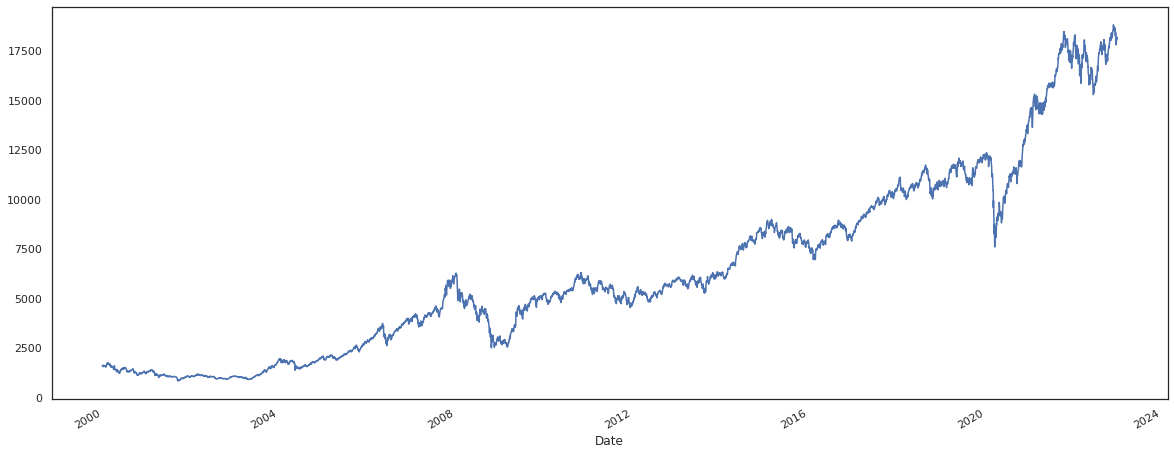

In [15]:
plt.figure(figsize=[20,8])
df['Close'].plot()

In [16]:
#train test split 
to_row = int(len(df)*0.8)
train_data = list(df[0:to_row]['Close'])
test_data = list(df[to_row:]['Close'])

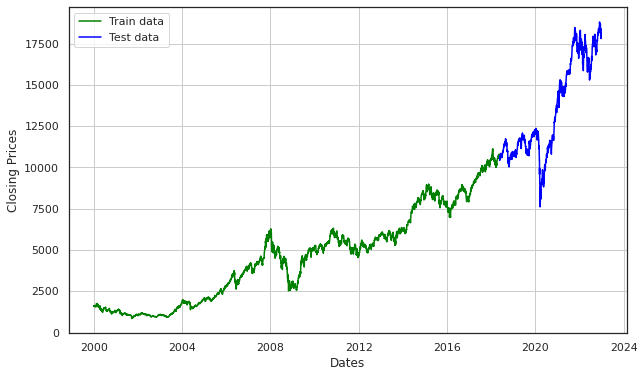

In [17]:
#split data into train and training set 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df [0:to_row]['Close'], 'green', label='Train data')
plt.plot(df[to_row: ]['Close'], 'blue', label='Test data') 
plt.legend()

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['Close'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [21]:
adfuller_test(df['Close'])

ADF Test Statistic : 1.1658250963663577
p-value : 0.99574104912137
#Lags Used : 34
Number of Observations Used : 5687
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# **Differencing**

In [22]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)

In [23]:
df['Close']

Date
2000-01-03     1592.2
2000-01-04     1638.7
2000-01-05     1595.8
2000-01-06     1617.6
2000-01-07     1613.3
               ...   
2022-12-26    18014.6
2022-12-27    18132.3
2022-12-28    18122.5
2022-12-29    18191.0
2022-12-30    18105.3
Name: Close, Length: 5722, dtype: float64

In [24]:
## Again test dickey fuller test
adfuller_test(df['Close First Difference'].dropna())

ADF Test Statistic : -12.759792134806565
p-value : 8.19026535765324e-24
#Lags Used : 34
Number of Observations Used : 5686
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


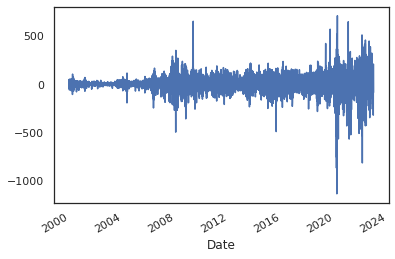

In [25]:
df['Close First Difference'].plot()

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [27]:
def cor_plots(x):
  fig = plt.figure(figsize=(12,8))
  ax1 = fig.add_subplot(211)
  fig = sm.graphics.tsa.plot_acf(df['Close First Difference'].dropna(),lags=24,ax=ax1)
  ax2 = fig.add_subplot(212)
  fig = sm.graphics.tsa.plot_pacf(df['Close First Difference'].dropna(),lags=24,ax=ax2)


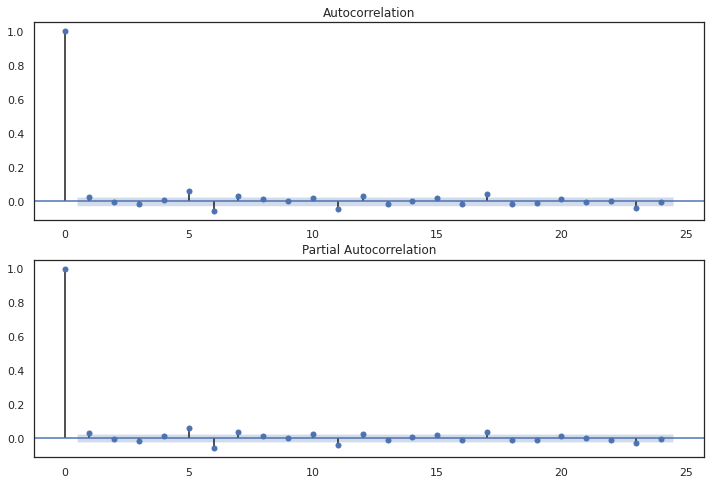

In [28]:
# Get Autocorrelation plot
cor_plots('Close First Diffrence')

In [29]:
model_prediction = []
n_test_obser = len(test_data)

In [30]:
#train test split 
to_row = int(len(df)*0.8)
train_data = list(df[0:to_row]['Close'])
test_data = list(df[to_row:]['Close'])

In [31]:
from statsmodels.tsa.arima.model import ARIMA



In [32]:
for i in range(n_test_obser):
  model = ARIMA(train_data,order = (0,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_prediction.append(yhat)
  actual_test_value = test_data[i]
  train_data.append(actual_test_value)


In [33]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5721
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -33696.083
Date:                Tue, 17 Jan 2023   AIC                          67396.167
Time:                        12:23:34   BIC                          67409.470
Sample:                             0   HQIC                         67400.798
                               - 5721                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0285      0.006      4.615      0.000       0.016       0.041
sigma2      7666.1177     50.788    150.943      0.000    7566.575    7765.660
Ljung-Box (L1) (Q):                   0.01   Jarque-

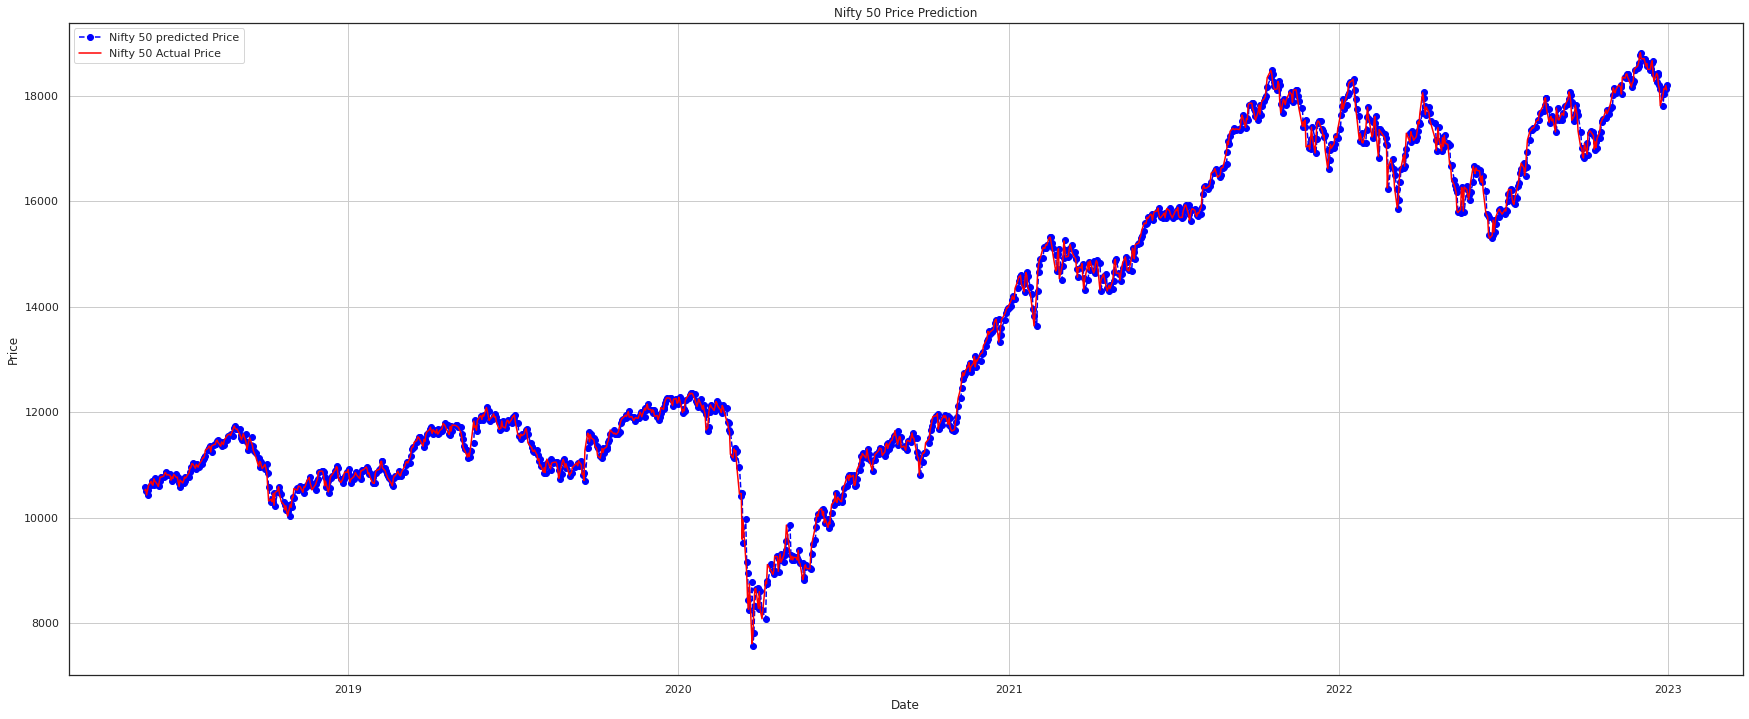

In [34]:
plt.figure(figsize=(30,12)) 
plt.grid(True)
date_range= df[to_row: ].index
plt.plot(date_range, model_prediction, color = 'blue', marker = 'o', linestyle = 'dashed', label='Nifty 50 predicted Price')
plt.plot(date_range, test_data, color = 'red', label = 'Nifty 50 Actual Price')
plt.title('Nifty 50 Price Prediction')
plt.xlabel("Date")
plt.ylabel('Price')
plt.legend()
plt.show()

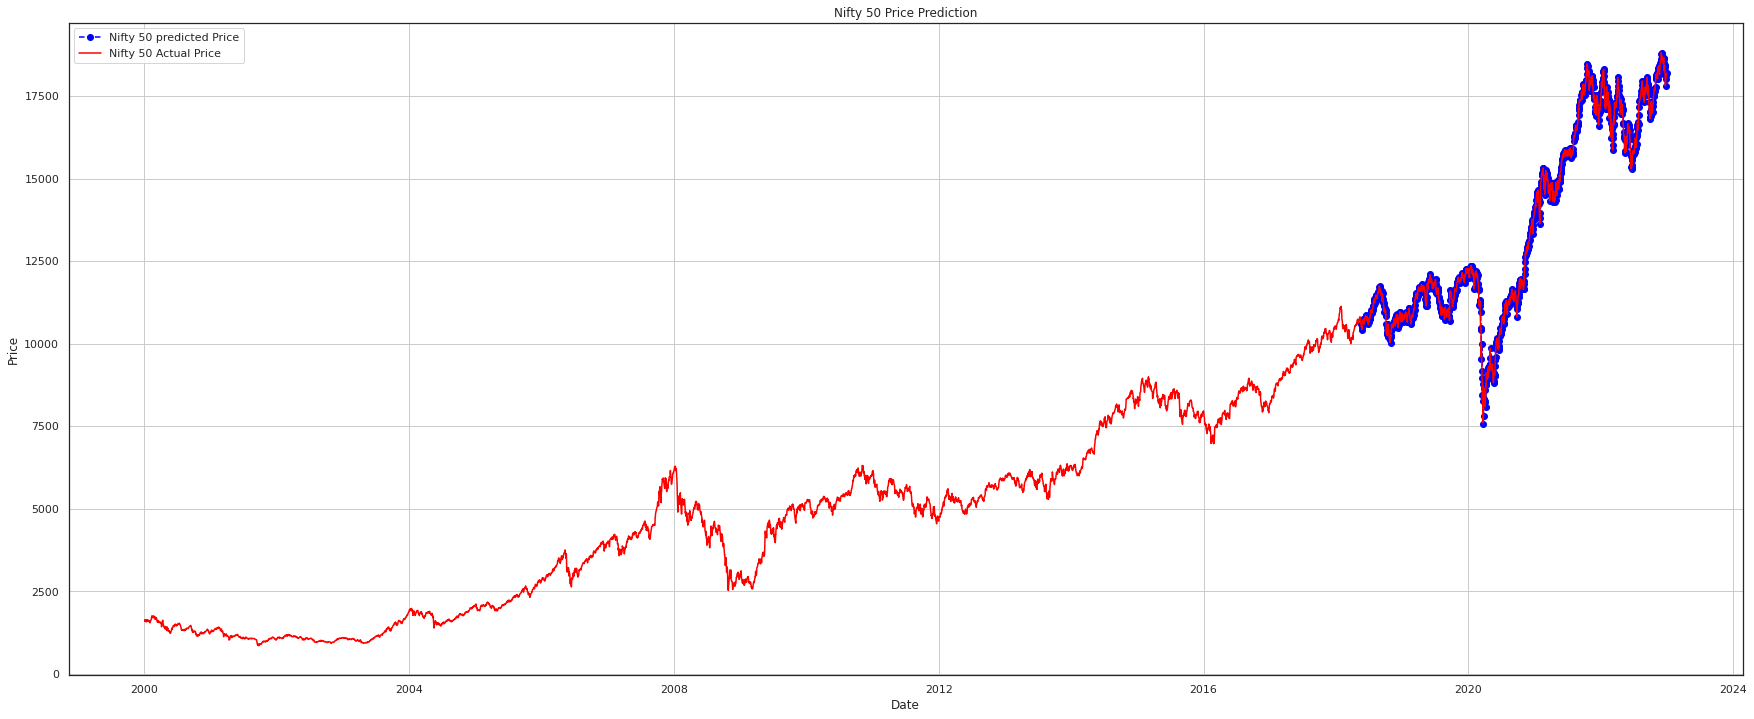

In [35]:
plt.figure(figsize=(30,12)) 
plt.grid(True)
date_range= df[to_row: ].index
plt.plot(date_range, model_prediction, color = 'blue', marker = 'o', linestyle = 'dashed', label='Nifty 50 predicted Price')
plt.plot(df['Close'], color = 'red', label = 'Nifty 50 Actual Price')
plt.title('Nifty 50 Price Prediction')
plt.xlabel("Date")
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
mape= np.mean(np.abs(np.array(model_prediction[:]) - np.array(test_data))/np.abs (test_data)) 
print("MAPE: "+str(mape)) # Mean Absolute Percentage Error

#Around 3.8% APE (Mean Absolute Percentage Error) implies the model is about 96.2% accurate in predicting the test set observations,

MAPE: 0.00837752202307945


In [37]:
from sklearn.metrics import r2_score
# Calculate R-squared
r_squared = r2_score(test_data, model_prediction)
print(r_squared)

0.9971900424802613


# **LSTM**

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense


In [56]:
df_1 = df_org.copy()

In [57]:
# Convert Month into Datetime
df_1['Date']=pd.to_datetime(df_1['Date'])

In [58]:
# extract the Close prices and the date
df_1 = df_1[['Date','Close']]

In [59]:
print(df_1)

           Date    Close
0    2000-01-03   1592.2
1    2000-01-04   1638.7
2    2000-01-05   1595.8
3    2000-01-06   1617.6
4    2000-01-07   1613.3
...         ...      ...
5717 2022-12-26  18014.6
5718 2022-12-27  18132.3
5719 2022-12-28  18122.5
5720 2022-12-29  18191.0
5721 2022-12-30  18105.3

[5722 rows x 2 columns]


In [60]:
# Normalize the data
scaler = MinMaxScaler()
df_1['Close'] = scaler.fit_transform(df_1[['Close']])

In [61]:
# Split the data into training and test sets
train_size = int(len(df_1) * 0.8)
test_size = len(df_1) - train_size
train, test = df_1.iloc[0:train_size,:], df_1.iloc[train_size:len(df_1),:]

In [62]:
# Create input sequences and corresponding output sequences
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [63]:
look_back = 1
trainX, trainY = create_dataset(train[['Close']].values, look_back)
testX, testY = create_dataset(test[['Close']].values, look_back)

In [64]:
# Reshape the data for the LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [65]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
# Fit the model to the training data
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
4575/4575 - 11s - loss: 0.0016 - 11s/epoch - 2ms/step
Epoch 2/100
4575/4575 - 8s - loss: 2.2240e-05 - 8s/epoch - 2ms/step
Epoch 3/100
4575/4575 - 8s - loss: 2.3608e-05 - 8s/epoch - 2ms/step
Epoch 4/100
4575/4575 - 8s - loss: 2.1309e-05 - 8s/epoch - 2ms/step
Epoch 5/100
4575/4575 - 8s - loss: 2.1761e-05 - 8s/epoch - 2ms/step
Epoch 6/100
4575/4575 - 9s - loss: 2.1895e-05 - 9s/epoch - 2ms/step
Epoch 7/100
4575/4575 - 8s - loss: 2.1680e-05 - 8s/epoch - 2ms/step
Epoch 8/100
4575/4575 - 8s - loss: 2.0271e-05 - 8s/epoch - 2ms/step
Epoch 9/100
4575/4575 - 9s - loss: 2.0292e-05 - 9s/epoch - 2ms/step
Epoch 10/100
4575/4575 - 10s - loss: 2.1069e-05 - 10s/epoch - 2ms/step
Epoch 11/100
4575/4575 - 8s - loss: 2.0131e-05 - 8s/epoch - 2ms/step
Epoch 12/100
4575/4575 - 8s - loss: 2.0191e-05 - 8s/epoch - 2ms/step
Epoch 13/100
4575/4575 - 8s - loss: 1.9545e-05 - 8s/epoch - 2ms/step
Epoch 14/100
4575/4575 - 9s - loss: 2.0154e-05 - 9s/epoch - 2ms/step
Epoch 15/100
4575/4575 - 8s - loss: 1.9405e

In [67]:
# Make predictions on the test data
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


36/36 [==============================] - 0s 2ms/step


In [68]:
# Inverse the normalized values
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)Mahalanobis distance 
testY = scaler.inverse_transform([testY])

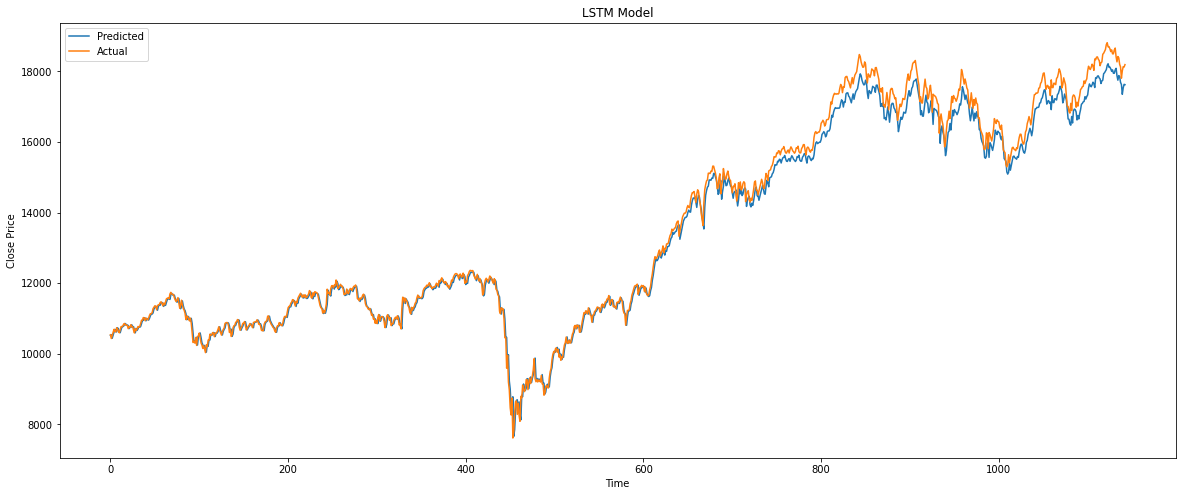

In [ ]:
plt.figure(figsize=(20,8))

# Plot the predicted values
plt.plot(testPredict)

# Plot the actual values
plt.plot(testY)

# Plot the graph
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('LSTM Model')
plt.legend(['Predicted', 'Actual'])
plt.show()


In [70]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(testY, testPredict)
print('MAPE: ', mape)


MAPE:  23.0969986754089


In [71]:
from sklearn.metrics import r2_score
testY = testY.reshape(-1,1)
r2 = r2_score(testY, testPredict)
print('R-Squared: ', r2)


R-Squared:  0.9649005167373946
